## Titanic Machine Learning Using Random Forest
* There is a very famous problem in the machine learning world: Titanic.

* The goal here is to predict which passengers on board the Titanic survived.


## Analysis Content
1. [Python Libraries](#1)
1. [Data Set](#2)
1. [Missing Values](#3)
1. [Age - Missing Values](#4)
1. [Which Port Do the Passengers Board from](#5)
1. [Final Decision and Implementation](#6)
1. [Unnecessary Variable Analysis](#7)
1. [Categorical Variables](#8)
1. [Exploratory Data Analysis](#9)
1. [EDA for Age Variable](#10)
1. [EDA for Fare Variable](#11)
1. [EDA for Passenger Variable](#12)
1. [EDA for Family or Solo Travel](#13)
1. [EDA for Sex Variable](#14)
1. [Feature Scaling](#15)
1. [Model and Prediction](#16)
1. [Submission](#17)

<a id = '1' ></a>
## Python Libraries

In [1]:

# For example, here's several helpful library to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id = '2' ></a>
## Data Set

In [2]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

In [3]:
# train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<a id = '3' ></a>
## Missing Values

In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<a id = '4' ></a>
## Age - Missing Values

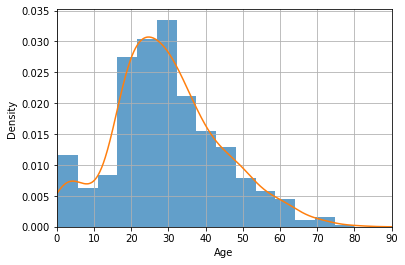

In [7]:
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, alpha=0.7)

train_df['Age'].plot(kind='density')

ax.set(xlabel='Age')
plt.xlim(0, 90)
plt.grid()
plt.show()

In [8]:
train_df['Age'].mean(skipna=True)

29.69911764705882

In [9]:
test_df['Age'].mean(skipna=True)

30.272590361445783

In [10]:
train_df['Age'].median(skipna=True)

28.0

In [11]:
test_df['Age'].median(skipna=True)

27.0

<a id = '5' ></a>
## Which Port Do the Passengers Board from

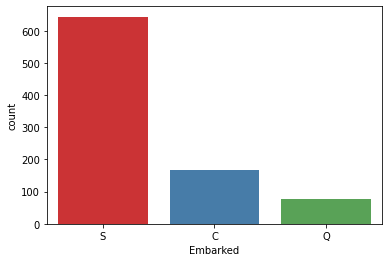

In [12]:
sns.countplot(x='Embarked', data=train_df, palette='Set1')
plt.show()

In [13]:
print('Most boarded port: ', train_df['Embarked'].value_counts().idxmax())

Most boarded port:  S


In [14]:
train_data = train_df.copy()
test_data = test_df.copy()

<a id = '6' ></a>
## Final Decision and Implementation
* **Age ->** We will fill in the missing values with the median method
* **Embarked ->** We will fill in the missing values as 'S'
* **Cabin ->** We will drop this column because there are too many missing values

In [15]:
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Age"].fillna(test_df["Age"].median(skipna=True), inplace=True)

In [16]:
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
test_data["Embarked"].fillna(test_df['Embarked'].value_counts().idxmax(), inplace=True)

In [17]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [18]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [20]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)

In [21]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [23]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


<a id = '7' ></a>
## Unnecessary Variable Analysis
* **SibSp**: # of siblings / spouses aboard the Titanic
* **Parch**: # of parents / children aboard the Titanic
    * As you can see, both variables are very related and highly correlated.
    * It would be healthier to collect these two variables under one variable: **SoloTravel**

    * Let's name our variable **SoloTravel**. And this will be a categorical variable. 0 or 1.

In [24]:
train_data['SoloTravel'] = np.where((train_data["SibSp"] + train_data["Parch"]) > 0, 0, 1)
test_data['SoloTravel'] = np.where((test_data["SibSp"] + test_data["Parch"]) > 0, 0, 1)

In [25]:
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,SoloTravel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


<a id = '8' ></a>
## Categorical Variables
* "Pclass","Embarked","Sex" columns are categorical -> we need to encode them

In [27]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,SoloTravel
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,0


In [28]:
train_data = pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"], drop_first=True)

In [29]:
train_data.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,1,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,1,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,1,0,1,1


In [30]:
test_data.head()

,PassengerId,Name,Age,Ticket,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,892,"Kelly, Mr. James",34.5,330911,7.8292,1,0,1,1,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,0,0,1,0,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,1,1,0,1,0,1
3,895,"Wirz, Mr. Albert",27.0,315154,8.6625,1,0,1,0,1,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,0,0,1,0,1,0


In [31]:
train_data.drop('PassengerId', axis=1, inplace=True)
train_data.drop('Name', axis=1, inplace=True)
train_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('PassengerId', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

In [32]:
train_data.head()

,Survived,Age,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1


In [33]:
test_data.head()

,Age,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,1,1,0,1
1,47.0,7.0000,0,0,1,0,1,0
2,62.0,9.6875,1,1,0,1,0,1
3,27.0,8.6625,1,0,1,0,1,1
4,22.0,12.2875,0,0,1,0,1,0


<a id = '9' ></a>
## Exploratory Data Analysis

In [34]:
train_data.shape

(891, 9)

In [35]:
test_data.shape

(418, 8)

In [36]:
col_names = train_data.columns

col_names

Index(['Survived', 'Age', 'Fare', 'SoloTravel', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

<a id = '10' ></a>
## EDA for Age Variable
* The age distributions of survivors and those who died are quite similar.

* We can say that among the survivors, the proportion of children and young people is higher.

* This may be because parents are giving their children life jackets and boats to save theirs, instead of saving their own.

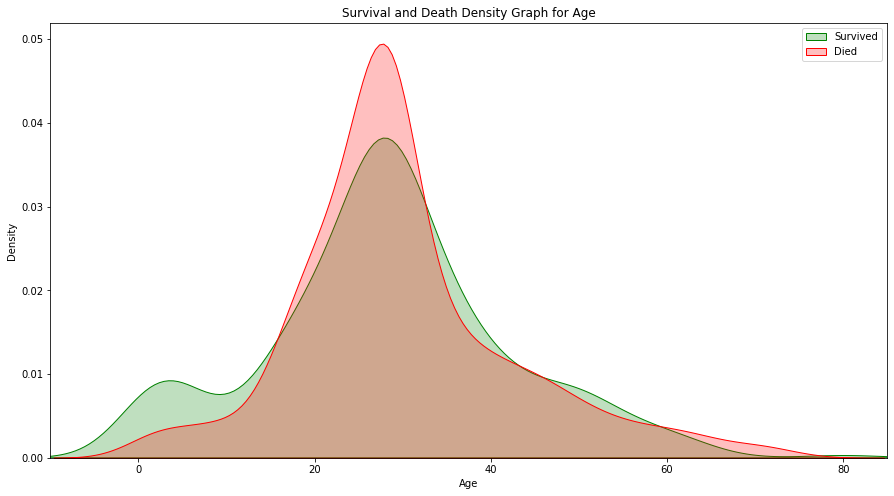

In [37]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(train_data["Age"][train_data.Survived == 1], color="green", shade=True)

sns.kdeplot(train_data["Age"][train_data.Survived == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Survival and Death Density Graph for Age')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

<a id = '11' ></a>
## EDA for Fare Variable
* When we look at the fare, we see that the survival and death rates are clearly separated from each other.

* Pay is likely to be an important factor in our model.

* Low fare passengers have a much higher death rate.

* Those who pay higher fares have a higher survival rate

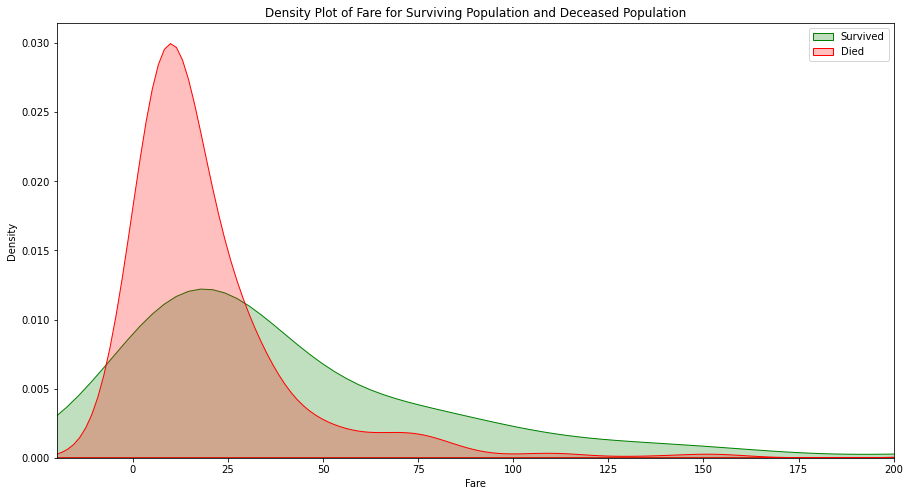

In [38]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(train_data["Fare"][train_data.Survived == 1], color="green", shade=True)

sns.kdeplot(train_data["Fare"][train_data.Survived == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

<a id = '12' ></a>
## EDA for Passenger Variable
* 1.class passengers have higher survival rates.
* Therefore, this confirms the assumption we made for Fare.

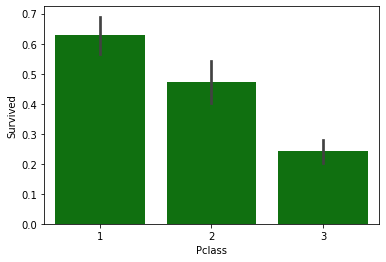

In [39]:
sns.barplot('Pclass', 'Survived', data=train_df, color="green")

plt.show()

<a id = '13' ></a>
## EDA for Family or Solo Travel
* Those traveling with family (SoloTravel = 0) have higher survival rates.

* This supports our assumption that most of them are children or teenagers and that they survive relatively longer.

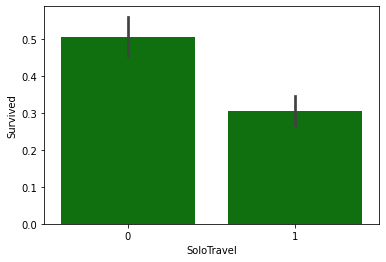

In [40]:
sns.barplot('SoloTravel', 'Survived', data=train_data, color="green")

plt.show()

<a id = '14' ></a>
## EDA for Sex Variable
* When we look at sex, we see a big difference between the survival rates of men and women.

* Survival rates for women are much higher.

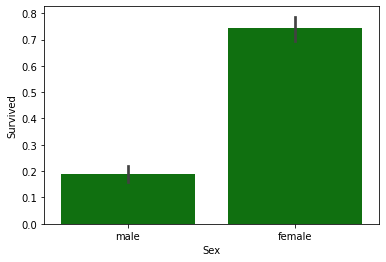

In [41]:
sns.barplot('Sex', 'Survived', data=train_df, color="green")

plt.show()

In [42]:
train_data.drop('Survived', axis=1, inplace=True)

<a id = '15' ></a>
## Feature Scaling

In [43]:
train_data.describe()

,Age,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.361582,32.204208,0.602694,0.206510,0.551066,0.086420,0.725028,0.647587
std,13.019697,49.693429,0.489615,0.405028,0.497665,0.281141,0.446751,0.477990
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,35.000000,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
cols = train_data.columns

cols

Index(['Age', 'Fare', 'SoloTravel', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S', 'Sex_male'],
      dtype='object')

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

In [46]:
type(train_data)

numpy.ndarray

In [47]:
type(test_data)

numpy.ndarray

In [48]:
train_data = pd.DataFrame(train_data, columns=[cols])
test_data = pd.DataFrame(test_data, columns=[cols])

In [49]:
train_data.head()

,Age,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,1.0,0.0
3,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,1.0


In [50]:
test_data.head()

,Age,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.452723,0.015282,1.0,0.0,1.0,1.0,0.0,1.0
1,0.617566,0.013663,0.0,0.0,1.0,0.0,1.0,0.0
2,0.815377,0.018909,1.0,1.0,0.0,1.0,0.0,1.0
3,0.353818,0.016908,1.0,0.0,1.0,0.0,1.0,1.0
4,0.287881,0.023984,0.0,0.0,1.0,0.0,1.0,0.0


<a id = '16' ></a>
## Model and Prediction

In [51]:
from sklearn.ensemble import RandomForestClassifier
y = train_df["Survived"]
X = train_data
X_test = test_data
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

In [52]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<a id = '17' ></a>
## Submission

In [53]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
